# テーマ
### 気象情報×睡眠時間

### 仮説
#### 最近寒くなってきているが、気温が低い時は布団に入っていたくなるので、睡眠時間は気温が低いほど長くなるのではないかと考えた

#### スクレイピングするデータ
- グループで決めたスクレイピングするデータは気象情報である。
- 自分が今回スクレイピングする気象情報は、最高気温と最低気温である
- 理由としては、睡眠時間が多くなるのは、最高気温と最低気温のどちらが影響するのか検証するためである

#### 自分で取得するデータ
- 睡眠時間
- これは今回「Pokemon Sleep」というアプリを使って睡眠時間を測ってcsvファイルに書き込んだ

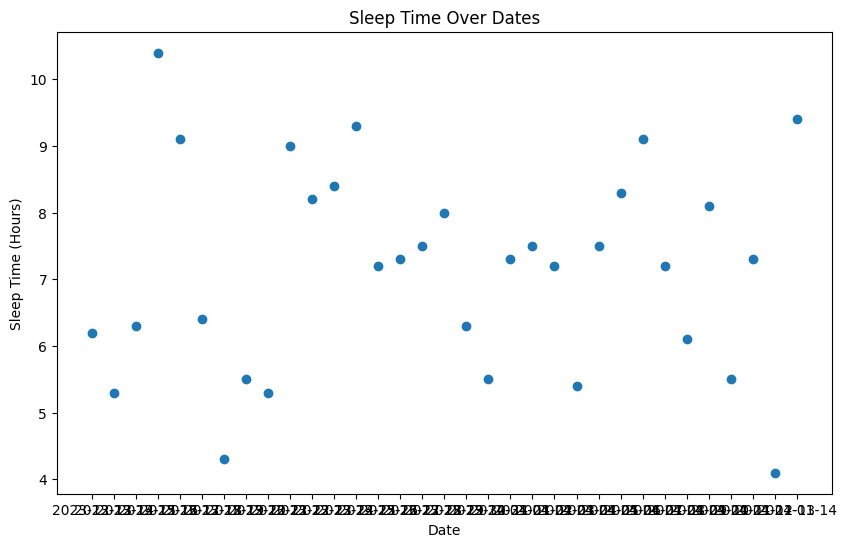

In [1]:
import sqlite3
import matplotlib.pyplot as plt

# データベースへの接続
conn = sqlite3.connect('./database.sqlite')
c = conn.cursor()

# データの取得
date_and_sleep_time_list = [data for data in c.execute('SELECT date, sleep_time FROM database')]
conn.close()

date_list = []
sleep_time_list = []

for date_str, sleep_time in date_and_sleep_time_list:
    date_str = date_str.replace("2023/12/","")
    date_str = date_str.replace("2024/01/","")
    date_list.append(date_str)  # 日付の文字列をdatetimeオブジェクトに変換
    sleep_time_list.append(sleep_time)

# Matplotlibでグラフをプロット
plt.figure(figsize=(10, 6))
plt.scatter(date_list, sleep_time_list, marker='o')  # 日付と睡眠時間をプロット
plt.xlabel('Date')
plt.ylabel('Sleep Time (Hours)')
plt.title('Sleep Time Over Dates')
# plt.gcf().autofmt_xdate()  # X軸の日付ラベルを斜めにして読みやすくする
# plt.grid(True)  # グリッドを表示
plt.show()

相関係数: 0.01
ほとんど相関がありません。


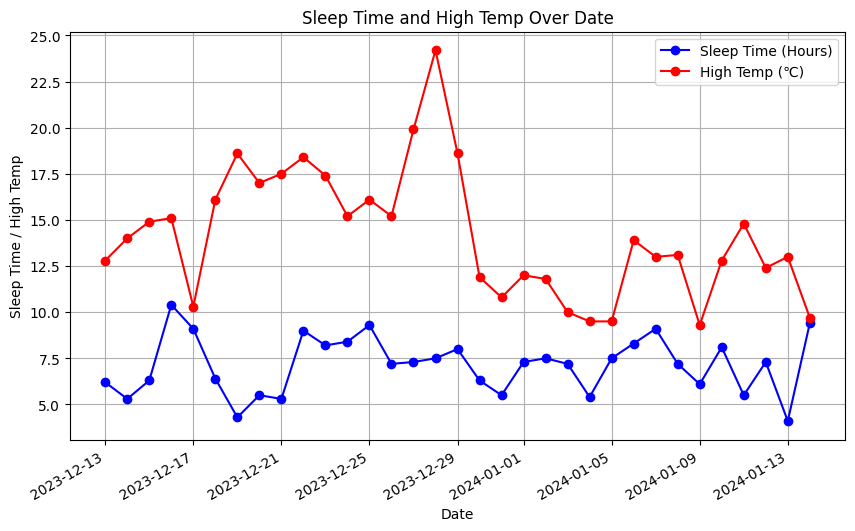

In [7]:
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

# データベースへの接続
conn = sqlite3.connect('./database.sqlite')
c = conn.cursor()

# データの取得
date_and_sleep_time_and_high_temp_list = [data for data in c.execute('SELECT date, sleep_time, high_temp FROM database')]
conn.close()

# リストの初期化
date_list = []
sleep_time_list = []
high_temp_list = []

# データのリストへの格納
for date_str, sleep_time, high_temp in date_and_sleep_time_and_high_temp_list:
    date_obj = datetime.strptime(date_str, '%Y-%m-%d') 
    date_list.append(date_obj)                         
    sleep_time_list.append(sleep_time)
    high_temp_list.append(high_temp)
    
# 相関関係の計算
correlation = np.corrcoef(sleep_time_list, high_temp_list)[0, 1]

# 相関関係を出力
print(f"相関係数: {correlation:.2f}")
# 相関係数の解釈
if correlation > 0.5:
    print("強い正の相関があります。")
elif 0.1 < correlation <= 0.5:
    print("中程度の正の相関があります。")
elif -0.1 <= correlation <= 0.1:
    print("ほとんど相関がありません。")
elif -0.5 <= correlation < -0.1:
    print("中程度の負の相関があります。")
else:
    print("強い負の相関があります。")

# Matplotlibでグラフをプロット
plt.figure(figsize=(10, 6))

# 睡眠時間に対する日付のプロット（折れ線グラフ）
plt.plot(date_list, sleep_time_list, label='Sleep Time (Hours)', color='blue', marker='o')

# 最高気温に対する日付のプロット（折れ線グラフ）
plt.plot(date_list, high_temp_list, label='High Temp (℃)', color='red', marker='o')
plt.xlabel('Date')
plt.ylabel('Sleep Time / High Temp')
plt.title('Sleep Time and High Temp Over Date')
plt.gcf().autofmt_xdate() 
plt.legend() 
plt.grid(True) 
plt.show() 

相関係数: -0.01
ほとんど相関がありません。


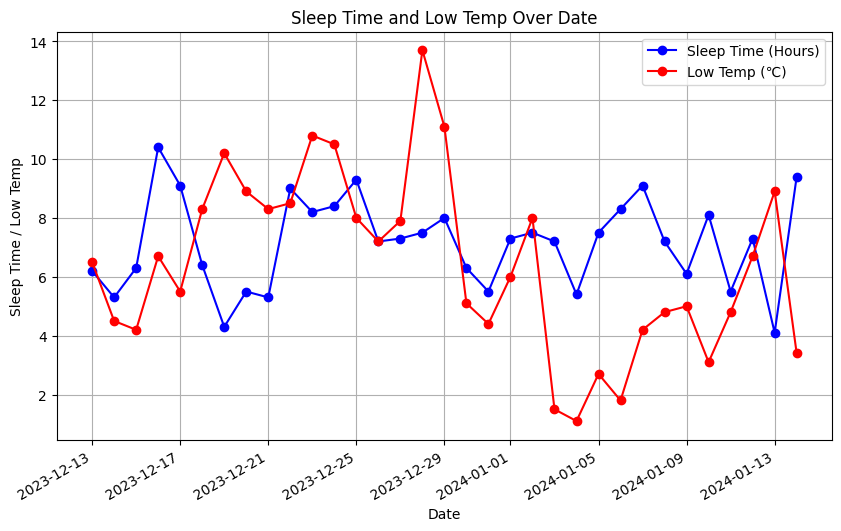

In [8]:
import sqlite3
import matplotlib.pyplot as plt
from datetime import datetime

# データベースへの接続
conn = sqlite3.connect('./database.sqlite')
c = conn.cursor()

# データの取得
date_and_sleep_time_and_low_temp_list = [data for data in c.execute('SELECT date, sleep_time, low_temp FROM database')]
conn.close()

# リストの初期化
date_list = []
sleep_time_list = []
low_temp_list = []

# データのリストへの格納
for date_str, sleep_time, low_temp in date_and_sleep_time_and_low_temp_list:
    # 日付の文字列をdatetimeオブジェクトに変換
    date_obj = datetime.strptime(date_str, '%Y-%m-%d') 
    date_list.append(date_obj)                         
    sleep_time_list.append(sleep_time)
    low_temp_list.append(low_temp)

# 相関関係の計算
correlation = np.corrcoef(sleep_time_list, low_temp_list)[0, 1]

# 相関関係を出力
print(f"相関係数: {correlation:.2f}")
# 相関係数の解釈
if correlation > 0.5:
    print("強い正の相関があります。")
elif 0.1 < correlation <= 0.5:
    print("中程度の正の相関があります。")
elif -0.1 <= correlation <= 0.1:
    print("ほとんど相関がありません。")
elif -0.5 <= correlation < -0.1:
    print("中程度の負の相関があります。")
else:
    print("強い負の相関があります。")

# Matplotlibでグラフをプロット
plt.figure(figsize=(10, 6))

# 睡眠時間に対する日付のプロット（折れ線グラフ）
plt.plot(date_list, sleep_time_list, label='Sleep Time (Hours)', color='blue', marker='o')

# 最低気温に対する日付のプロット（折れ線グラフ）
plt.plot(date_list, low_temp_list, label='Low Temp (℃)', color='red', marker='o')
plt.xlabel('Date')
plt.ylabel('Sleep Time / Low Temp')
plt.title('Sleep Time and Low Temp Over Date')
plt.gcf().autofmt_xdate()
plt.legend()
plt.grid(True)
plt.show() 


# 可視化を行なった考察
### 睡眠時間と日付のグラフからの考察
- 日付と睡眠時間のグラフを見ると、前半部分は睡眠時間が短いことがわかった。
- これは、学校生活があったからであると考えられる。
- また、真ん中のグラフの部分は冬休みに入ったので、必然と長い時間睡眠していることがわかった。

### 睡眠時間と最高気温を時系列順に表したグラフからの考察
- 睡眠時間と最高気温を時系列データとして表したグラフからわかったことは最高気温が睡眠時間に影響はあまり与えないことである。
- 理由として、ほとんどが昼頃に最高気温になる。
- 自分が起きる時間は朝なことが多い。
- したがって最高気温と睡眠時間の関係は、ほぼ関係がないと言って良いと思った。

### 睡眠時間と最低気温を時系列順に表したグラフからの考察
- 睡眠時間と最低気温を時系列データとして表したグラフから目で見てわかったことは最低気温が睡眠時間に影響を与える場合があると感じた。
- 上記のグラフを見てみると、比較的気温が高い日は睡眠時間が短く、比較的に気温が低い日は睡眠時間が長い傾向があった。
- また、最低気温はほとんどが太陽が出る前の朝に起こる。
- したがって、最低気温が睡眠時間に影響を与える可能性があると考えた。
- しかしながら、相関係数を見ると結果は-0.01であった。
- よって目では相関があるように見えたが、結果的には相関はないということがわかり最低気温が睡眠時間に影響を与えることはほぼないと思った。